## Исследование данных о российском кинопрокате



В ходе этой работы мы изучим рынок российского кинопроката и попробуем выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [63]:
import pandas as pd # импорт pandas
import seaborn as sns # импорт seaborn
import matplotlib.pyplot as plt # импорт pyplot
import re # импорт библиотеки re

In [2]:
# считываем файлы
movies = pd.read_csv('/datasets/mkrf_movies.csv')
show = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
movies.drop(index=movies[movies['puNumber']=='нет'].index,inplace=True) # удаляем строчку с 'нет' в столбце puNumber
 
movies['puNumber'] = movies['puNumber'].astype('int') # меняем тип столбца puNumber
movies_merge = movies.merge(show, how='left', left_on='puNumber',right_on='puNumber') # сливаем 2 таблицы по столбцу puNumber

При попытке сразу же слить ДФ после считывания получил ошибку о невозможности сравнения столбцов puNumber в исходных ДФ по причине различия типа данных(object в mkrf_movies.csv и int в mkrf_shows.csv).<br>Сменить тип данных не удалось по причине невозможности перевода существующего значения "нет" в одной из ячеек.<br>Т.к. возможности восстановить данные из этой ячейки нет, строчка была удалена из ДФ.<br>Тип данных сменен и произведено слияние.

In [4]:
# переименуем столбец в соотвествие со стилем "хорошего тона" написания
movies_merge = movies_merge.rename(columns={'puNumber':'pu_number'}) 

In [50]:
movies_merge.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_director,main_genre,percent_of_support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указан,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [5]:
movies_merge.info() # информация о ДФ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [6]:
movies_merge.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Нужно поменять типы данных в столбцах 'show_start_date' на временной и в 'ratings' на вещественный

In [7]:
# форматируем дату и одновременно тип столбца
movies_merge['show_start_date'] = pd.to_datetime(movies_merge['show_start_date'],format='%Y-%m-%d')

Столбец ratings содержит вещественные числа. Поменять тип на float "в лоб" не получилось из-за наличия значений, содержащих символ '%', поэтому от них решено избавиться. Чтобы через лямбда-функцию можно было методом find() найти эти значения, предварительно были заменены пропущенные (nan) значения столбца ratings на 0.<br>И в конце,значения рейтинга больше 10 (записанные ранее в процентах) были разделены на на 10 для соответствия правилам рейтинга.

In [8]:
movies_merge['ratings'].fillna('0', inplace=True) # убираем 'nan' из колонки ratings

# убираем символ '%' в колонке ratings
movies_merge['ratings'] = movies_merge['ratings'].apply(lambda x: (x.replace('%','')) if (x.find('%')>0) else x)

movies_merge['ratings'] = movies_merge['ratings'].astype('float') # переводим столбец во float

# если рейтинг больше 10, то делим его на 10
movies_merge['ratings'] = movies_merge['ratings'].apply(lambda x: x/10 if x>10 else x)

In [9]:
# выведем уникальные значения столбца ratings, удостовериться, что нет рейтинга, выбивающегося за границы 0-10
sorted(movies_merge['ratings'].unique())

[0.0,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.1,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.2,
 9.4,
 9.7,
 9.8,
 9.9]

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [10]:
movies_merge.isna().sum() # количество пропусков в данных

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                     0
genres                    975
box_office               4327
dtype: int64

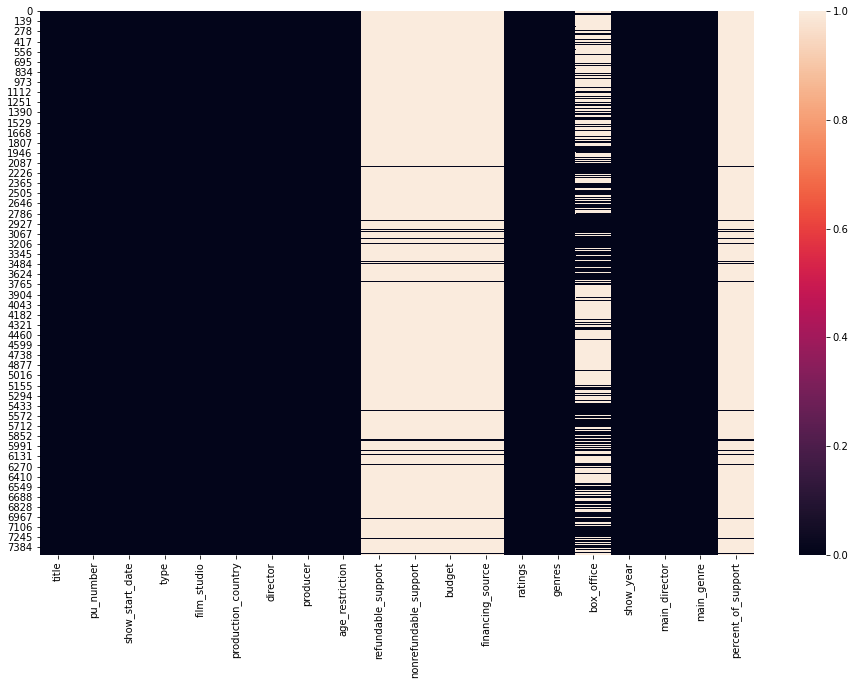

In [67]:
plt.figure(figsize=(16,10)) # задаем размер графика
sns.heatmap(movies_merge.isna()) # создаем график
plt.show() # рисуем график

In [11]:
wo_dir = movies_merge[movies_merge['director'].isna()]['title']
print(f'Количество строк с пропущенным director: {len(wo_dir)}')
print(f"Сколько фильмов с такими же названиями в ДФ:{len(movies_merge.query('title in @wo_dir'))}")

Количество строк с пропущенным director: 9
Сколько фильмов с такими же названиями в ДФ:9


In [12]:
movies_merge['director'].fillna('Не указан',inplace=True) # Заполняем пропуски в столбце director

Пропуски в столбце 'director' заполняем на 'Не указан', т.к. строки с этими фильмами представлены в одном экземпляре и восстановить данные из похожих строк не представляется возможным

In [13]:
wo_prod = movies_merge[movies_merge["producer"].isna()]["title"]
print(f'Количество строк с пропущенным producer: {len(wo_prod)}')
print(f"Сколько фильмов с такими же названиями в ДФ:{len(movies_merge.query('title in @wo_prod'))}")

Количество строк с пропущенным producer: 568
Сколько фильмов с такими же названиями в ДФ:576


In [14]:
print(movies_merge.query('(title in @wo_prod) and ~producer.isna()')['title'])
movies_merge.query('title == "Ложные признания"')

5513            Прощание
5936               Успех
6869    Ложные признания
6898           Валентина
6908            Прощание
7280            Прощание
7321               Успех
7473           Вторжение
Name: title, dtype: object


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3267,Ложные признания,121034216,2016-12-21 12:00:00+00:00,Художественный,"Арт Франс, Идеаль Аудиенс, Маха Продюксьон, Од...",Франция,Люк Бонди,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"драма,комедия",1242819.0
6869,Ложные признания,126001119,2019-04-26 12:00:00+00:00,Прочие,Гуд Компани Пикчерз,Дания - США,Катрин Филип,"Рейнхарт Бетц, Пол Видерхольд, Катрин Шальстрём",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.4,"драма,комедия",NaN


In [15]:
movies_merge['producer'].fillna('Не указан',inplace=True) # Заполняем пропуски в столбце producer

И хотя количество пропущенных producer меньше, чем количество фильмов с названиями, у которых это поле пропущено, при проверке выясняется, что это абсолютно разные картины и использовать заполенные ячейки для восстановления пропущенных нельзя. Поэтому так же как и в случае с director заменяем пропуски на "Не указан"

In [16]:
wo_fs = movies_merge[movies_merge['film_studio'].isna()]['title']
print(f'Количество строк с пропущенным film_studio: {len(wo_fs)}')
print(f"Сколько фильмов с такими же названиями в ДФ:{len(movies_merge.query('title in @wo_fs'))}")
movies_merge['film_studio'].fillna('Не указано',inplace=True) # Заполняем пропуски в столбце film_studio

Количество строк с пропущенным film_studio: 18
Сколько фильмов с такими же названиями в ДФ:18


Ситуация аналогична столбцу director. Сколько пропусков - столько фильмов. Копировать данные неоткуда.<br>Заполняем "Не заполнено"

In [17]:
wo_pc = movies_merge[movies_merge['production_country'].isna()]['title']
print(f'Количество строк с пропущенным production_country: {len(wo_pc)}')
print(f"Сколько фильмов с такими же названиями в ДФ:{len(movies_merge.query('title in @wo_pc'))}")
movies_merge['production_country'].fillna('Не указано',inplace=True) # Заполняем пропуски в столбце film_studio

Количество строк с пропущенным production_country: 2
Сколько фильмов с такими же названиями в ДФ:2


Ситуация аналогична столбцу director. Сколько пропусков - столько фильмов. Копировать данные неоткуда.<br>Заполняем "Не заполнено"

In [18]:
wo_genre = movies_merge[movies_merge['genres'].isna()]['title']
print(f'Количество строк с пропущенным genres: {len(wo_genre)}')
print(f"Сколько фильмов с такими же названиями в ДФ:{len(movies_merge.query('title in @wo_genre'))}")
movies_merge['genres'].fillna('Не указано',inplace=True) # Заполняем пропуски в столбце genres

Количество строк с пропущенным genres: 975
Сколько фильмов с такими же названиями в ДФ:975


Ситуация аналогична столбцу director. Сколько пропусков - столько фильмов. Копировать данные неоткуда.<br>Заполняем "Не заполнено"

Проверяем пропуски еще раз

In [19]:
movies_merge.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                     0
genres                      0
box_office               4327
dtype: int64

Дальнейшая обработка не нужна, т.к. по имеющейся информации столбец budget уже включает в себя полный объём государственной поддержки (источник - financing_source) , т.е. сумму столбцов refundable_support и nonrefundable_support. Т.к. количество пропусков у нас равно, по этим столбцам, то мексимальное количество данных, которое может быть, уже предоставлено.<br>То же самое и касается box_office (суммы сборов): вычислить ее нельзя. Если её нет, то её нет.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим наличие дубликатов по колонкам

In [20]:
for i in movies_merge:
    print(f'В столбце {i} {movies_merge[i].duplicated().sum()} дубликатов')
print(f'\nКоличесто строк-дублей:{movies_merge.duplicated().sum()}')
movies_merge.query('title=="Особо опасен"')

В столбце title 714 дубликатов
В столбце pu_number 2 дубликатов
В столбце show_start_date 5521 дубликатов
В столбце type 7477 дубликатов
В столбце film_studio 1994 дубликатов
В столбце production_country 6534 дубликатов
В столбце director 2673 дубликатов
В столбце producer 2135 дубликатов
В столбце age_restriction 7480 дубликатов
В столбце refundable_support 7450 дубликатов
В столбце nonrefundable_support 7409 дубликатов
В столбце budget 7194 дубликатов
В столбце financing_source 7481 дубликатов
В столбце ratings 7400 дубликатов
В столбце genres 6742 дубликатов
В столбце box_office 4546 дубликатов

Количесто строк-дублей:0


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Дубликаты есть и их много. Это объясняется тем, что уникальных значений для данного рода данных быть не может. Т.е. на фильм с одним и тем же названием могут получать несколько прокатных удостоверений различные телеканалы или киинотеатры. Собственно, уже от этого и появляются дубли. Т.к. остальная информация о фильме: студия производства, режиссер, ограничение по возрасту и т.д. автоматически будет дублироваться так же.<br>При этом нет строк-дублей, т.е. все строки уникальны в той или иной части

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

При рассмотрении уникальных значнией столбца type и production_country было выявлено, что есть неявные дубликаты для значений столбца. Например, 'Анимационный' и ' Анимационный', т.е. с пробелом в начале и\или конце значения. Помимо этого, есть значения вида 'Австралия - США', 'Австралия, США' и Австралия-США. Приведем их к записи через "," без пробелов.
<br>Избавляемся от этих дубликатов.

In [21]:
sorted(movies_merge['type'].unique()) # проверяем уникальные значения столбца type

[' Анимационный',
 ' Художественный',
 'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

In [23]:
movies_merge['type'] = movies_merge['type'].apply(lambda x: re.sub(r'^ *','',x)) # убираем пробел(ы) в начале значения
sorted(movies_merge['type'].unique()) # проверяем уникальные значения повторно

['Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

In [24]:
# Заменяем пропуски в production_country на "Не указана"
movies_merge['production_country'].fillna('Не указана',inplace=True) 

# убираем пробел(ы) в начале значения
movies_merge['production_country'] = movies_merge['production_country'].apply(lambda x: re.sub(r'^ *','',x))
# убираем пробел(ы) в конце значения
movies_merge['production_country'] = movies_merge['production_country'].apply(lambda x: re.sub(r' *$','',x))

movies_merge['production_country'] = movies_merge['production_country'].apply(lambda x: re.sub(r' *- *',',',x))
movies_merge['production_country'] = movies_merge['production_country'].apply(lambda x: re.sub(r', *',',',x))
movies_merge['production_country'] = movies_merge['production_country'].apply(lambda x: re.sub(r',,',',',x))
sorted(movies_merge['production_country'].unique())

['2019',
 'CША',
 'Австралия',
 'Австралия,Великобритания',
 'Австралия,Великобритания,Бельгия,Индия',
 'Австралия,Германия',
 'Австралия,Ирландия',
 'Австралия,Канада',
 'Австралия,Колумбия',
 'Австралия,США',
 'Австралия,Турция,США',
 'Австрия',
 'Австрия,Великобритания,Германия',
 'Австрия,Германия',
 'Австрия,Германия,Франция',
 'Австрия,Люксембург',
 'Австрия,Франция,Германия',
 'Азербайджан,Россия',
 'Аргентина',
 'Аргентина,Бразилия',
 'Аргентина,Испания',
 'Аргентина,Испания,Уругвай',
 'Аргентина,Мексика,Бразилия,Франция,США',
 'Аргентина,Уругвай,Россия,Германия,Франция,Нидерланды',
 'Аргентина,Франция,Испания',
 'Армения',
 'Армения,Германия',
 'Армения,Казахстан',
 'Армения,Россия',
 'Бельгия',
 'Бельгия,Великобритания,США',
 'Бельгия,Германия,Канада,Франция,США,Великобритания',
 'Бельгия,Германия,Люксембург',
 'Бельгия,Германия,Люксембург,Франция',
 'Бельгия,Испания,Канада,Нидерланды',
 'Бельгия,Италия,Франция',
 'Бельгия,Канада',
 'Бельгия,Люксембург',
 'Бельгия,Люксембург,

Есть строчка со страной производства "2019". Найдем и изменим на правильную, найдя фильм по названию в интернет.

In [25]:
movies_merge.query('production_country == "2019"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7246,Дело Коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал",NaN


In [26]:
movies_merge.loc[7246,'production_country'] = "Германия"

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

По предоставленной информации, столбец budget - это как минимум сумма столбцов refundable_support и nonrefundable_support, но никак не может быть меньше. Но есть строки, где budget = 0. Это странно.<br> т.к. в дальнейшем нам нужно будет считать какую долю от общего бюджета фильма составляет государственная поддержка, это приведет к делению на 0. И хотя количество строк, где бюджет = 0 составляет 5% от общего числа фильмов с указанным бюджетом, я считаю, что эти строчки нужно удалить.

In [27]:
# процент фильмов с нулем в бюджете
len(movies_merge.query('budget < refundable_support+nonrefundable_support'))/len(movies_merge[~movies_merge['budget'].isna()])*100

5.120481927710843

In [28]:
movies_merge.drop(movies_merge.query('budget == 0').index, inplace=True) # удаляем строки с нулевым бюджетом

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [29]:
movies_merge['show_year'] = movies_merge['show_start_date'].dt.year # добавим столбец с годом проката

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [30]:
# функция для получения первого значения из списка значений, разделенных запятой, в ячейке ДФ
def get_main(cell):
    return cell.split(',')[0]

In [31]:
movies_merge['main_director'] = movies_merge['director'].apply(get_main) # делаем столбец главных режиссеров
movies_merge['main_genre'] = movies_merge['genres'].apply(get_main) # делаем столбец главных жанров

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [32]:
movies_merge['percent_of_support'] = ((movies_merge['refundable_support']+movies_merge['nonrefundable_support'])/movies_merge['budget'])*100

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

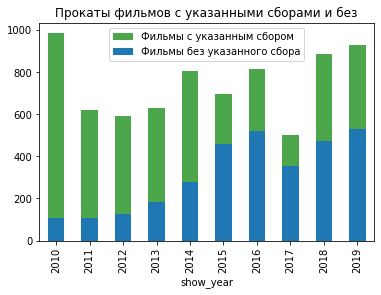

Доля фильмов, с указанной информацией о прокате в кинотеатрах к общему количеству фильмов:
 show_year
2010    0.106599
2011    0.175241
2012    0.215852
2013    0.292063
2014    0.345342
2015    0.656652
2016    0.641718
2017    0.705765
2018    0.531003
2019    0.569429
Name: title, dtype: float64


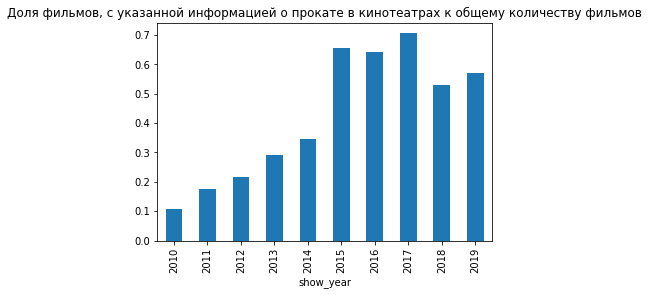

In [75]:

show_total_by_year = movies_merge.groupby('show_year')['title'].agg('count')
show_w_bo_by_year = movies_merge.query('box_office == box_office').groupby('show_year')['title'].agg('count')
show_total_by_year.plot(kind='bar',alpha=0.7, color='green',title='Прокаты фильмов с указанными сборами и без')
show_w_bo_by_year.plot(kind='bar')
plt.legend(["Фильмы с указанным сбором",'Фильмы без указанного сбора'])
plt.show()
print('Доля фильмов, с указанной информацией о прокате в кинотеатрах к общему количеству фильмов:\n',
      show_w_bo_by_year/show_total_by_year)
(show_w_bo_by_year/show_total_by_year).plot(kind='bar',
                                            title='Доля фильмов, с указанной информацией о прокате в кинотеатрах к общему количеству фильмов')
plt.show()

По графикам видна тенденция, что с 2010 года по 2017 год количество фильмов с указанной информацией о сборах в кинотеатрах росла. Можно предположить, что фильмов, которые были  успешны среди зрителей становилось в эти года больше и сумма сборов не скрывалась.<br>В 2018 году было мировое снижение рынка кинопроката и российского сегмента в частности. Возможно, из-за этого фильмы перестали показывать ожидаемые кассовые сборы и инофрмация о них неохотно публиковалась. Информацию об этом я нашел на сайте <a href = "https://www.fond-kino.ru/news/kinoprokat-rossii-itogi-2018-goda/"> Фонда Кино</a><br>Т.е. получившийся график соответсвует действительности

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Общая сумма кассовых сборов по годам:
 show_year
2010    2.428654e+06
2011    1.410276e+07
2012    6.955423e+06
2013    2.979971e+07
2014    7.434718e+09
2015    3.852783e+10
2016    4.674232e+10
2017    4.845815e+10
2018    4.925199e+10
2019    4.827810e+10
Name: box_office, dtype: float64


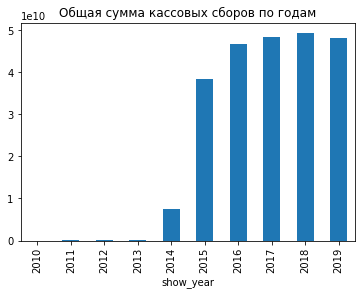

Минимальная сумма сборов была в 2010 году и составила 2428654.00
Максимальная сумма сборов была в 2018 году и составила 49251991405.20


In [35]:
box_sum = movies_merge.groupby('show_year')['box_office'].agg('sum')
print('Общая сумма кассовых сборов по годам:\n',box_sum)
box_sum.plot(kind='bar',title = 'Общая сумма кассовых сборов по годам')
plt.show()
print(f'Минимальная сумма сборов была в {box_sum.idxmin()} году и составила {box_sum.min():.2f}')
print(f'Максимальная сумма сборов была в {box_sum.idxmax()} году и составила {box_sum.max():.2f}')

В целом динамика по сумме сборов совпадает с долей опубликованных данных по сборам.<br>
Минимальная сумма кассовых сборов была зафиксирована в 2010 году. Но в этом же году и была самая низкая доля фильмов с указанной информацией о сборах в кинотеатрах за все время предоставленного наблюдения. Поэтому это ожидаемый результат.<br>
Максимальная же сумма была собрана в 2018 году, что не совпадает с графиком в предыдущем наблюдении. Можно предположить, что в 2018 году было выпущено некоторое количество высокорейтинговых фильмов, которые в сумме дали рекордные сборы, но при этом и было много "проходного" кино, кассовые сборы которых опубликованы не были. Тем самым, му получаем такое разнонаправленное наблюдение.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [36]:
movies_merge.pivot_table(index='show_year',values='box_office',aggfunc=['mean','median'])

,mean,median
,box_office,box_office
show_year,,
2010,2.313004e+04,1700.00
2011,1.293832e+05,3000.00
2012,5.433924e+04,5660.00
2013,1.619549e+05,3522.50
2014,2.674359e+07,18137.50
2015,8.393862e+07,4784781.50
2016,8.937345e+07,3776087.56
2017,1.365018e+08,9919415.00


Таблица отлично показывает разницу между средним и медианным значениями на данных, имеющих выбросы. В данном случае, выбросы - это нулевые значения кассовых сборов, которые очень сильно затягивают среднее в левую сторону.

In [37]:
movies_merge[movies_merge['box_office']==0].groupby('show_year')['title'].agg("count") # количество фильмов с нулевыми сборами

show_year
2010    4
2012    5
2013    5
2014    6
2015    3
2016    1
Name: title, dtype: int64

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

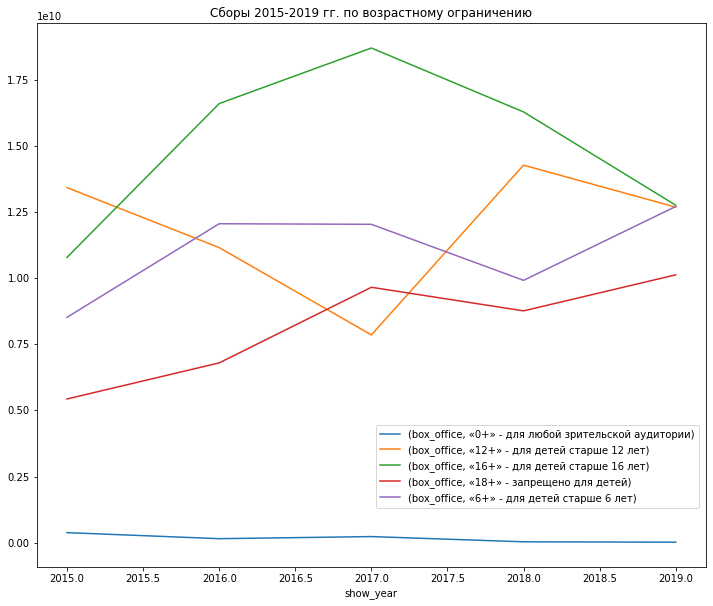

Сборы 2015-2019 гг. по возрастному ограничению:


box_office  \
age_restriction «0+» - для любой зрительской аудитории   
show_year                                                
2015                                      3.790546e+08   
2016                                      1.502288e+08   
2017                                      2.295989e+08   
2018                                      3.244900e+07   
2019                                      1.774607e+07   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
show_year                                         
2015                               1.341951e+10   
2016                               1.115076e+10   
2017                               7.851428e+09   
2018                               1.426729e+10   
2019                               1.268020e+10   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
show_year                                                                     
2015                               1.078160e+10                5.430351e+09   
2016                               1.659425e+10                6.793930e+09   
2017                               1.869459e+10                9.651496e+09   
2018                               1.627841e+10                8.760086e+09   
2019                               1.275342e+10                1.012180e+10   

                                               
age_restriction «6+» - для детей старше 6 лет  
show_year                                      
2015                             8.517312e+09  
2016                             1.205315e+10  
2017                             1.203103e+10  
2018                             9.913759e+09  
2019                             1.270494e+10

In [90]:
age_year_sum = movies_merge.query('2015<=show_year<=2019').pivot_table(index='show_year',columns='age_restriction',values=['box_office'],aggfunc='sum')
age_year_sum.plot(kind="line",figsize=(12,10),title='Сборы 2015-2019 гг. по возрастному ограничению')
plt.legend(bbox_to_anchor=(0.5, .1))
plt.show()
print(f'Сборы 2015-2019 гг. по возрастному ограничению:')
display(age_year_sum)

In [108]:
movies_merge.query('(show_year == 2017) and (age_restriction == "«16+» - для детей старше 16 лет") and (box_office == box_office)').sort_values(by='box_office').tail(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_director,main_genre,percent_of_support
3568,Меч короля Артура (2017),121007317,2017-04-25 12:00:00+00:00,Художественный,"Сафехауз Пикчерз, Виллидж Роадшоу Пикчерз, Уор...","США,Великобритания,Австралия",Гай Ричи,"Акива Голдсман, Гай Ричи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"фэнтези,боевик,драма",7.162418e+08,2017,Гай Ричи,фэнтези,NaN
3470,Красавица и Чудовище (2017),121004017,2017-03-03 12:00:00+00:00,Художественный,"Мандевилл Филмз, Уолт Дисней Пикчерз",США,Билл Кондон,"Тодд Либерман, Дэвид Хоберман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мюзикл,фэнтези,мелодрама",7.322872e+08,2017,Билл Кондон,мюзикл,NaN
5633,Звёздные войны: Последние джедаи,121026817,2017-12-13 12:00:00+00:00,Художественный,"Лукасфилм, Рэм Бергман Продакшнз, Уолт Дисней ...",США,Райан Джонсон,"Рэм Бергман, Кэтлин Кеннеди",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,0.0,Не указано,8.624714e+08,2017,Райан Джонсон,Не указано,NaN
5537,"Убийство в ""Восточном экспрессе""",121021717,2017-11-09 12:00:00+00:00,Художественный,"ХХ век Фокс, Жанр Филмз, Кинберг Жанр, Марк Го...","США,Мальта",Кеннет Брана,"Кеннет Брана, Марк Гордон, Джуди Хоффланд",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"детектив,криминал,драма",8.663595e+08,2017,Кеннет Брана,детектив,NaN
3743,Человек-паук: Возвращение домой,121011717,2017-06-22 12:00:00+00:00,Художественный,"Коламбиа Пикчерз, Марвел Студиос, Паскаль Пикчерз",США,Джон Уоттс,"Эми Паскаль, Кевин Фейги",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"фантастика,боевик,приключения",8.675114e+08,2017,Джон Уоттс,фантастика,NaN
3612,Мумия (2017),121009817,2017-05-30 12:00:00+00:00,Художественный,"Шон Даниэль Компани, Сикрит Хайдаут, Юниверсал...",США,Алекс Куртцман,"Шон Дэниэл, Алекс Куртцман, Крис Морган",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.6,"фэнтези,боевик,триллер",8.711515e+08,2017,Алекс Куртцман,фэнтези,NaN
5547,Тор: Рагнарёк,121022917,2017-11-02 12:00:00+00:00,Художественный,"Марвел Интертейнмент, Марвел Студиос, Уолт Дис...",США,Тайка Вайтити,Кеви Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.2,"история,драма,боевик",1.229588e+09,2017,Тайка Вайтити,история,NaN
5653,Джуманджи: Зов джунглей,121027517,2017-12-21 12:00:00+00:00,Художественный,"Мэтт Толмак Продакшнз, Радар Пикчерз, Севен Ба...",США,Джейк Касдан,Мэтт Толмак,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"фэнтези,боевик,комедия",1.246588e+09,2017,Джейк Касдан,фэнтези,NaN
3522,Стражи Галактики. Часть 2,121008117,2017-04-27 12:00:00+00:00,Художественный,"Марвел Студиос, Уолт Дисней Пикчерз",США,Джеймс Ганн,Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик,приключения",1.468780e+09,2017,Джеймс Ганн,фантастика,NaN
3487,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,комедия",2.118396e+09,2017,Йоаким Реннинг,фэнтези,NaN


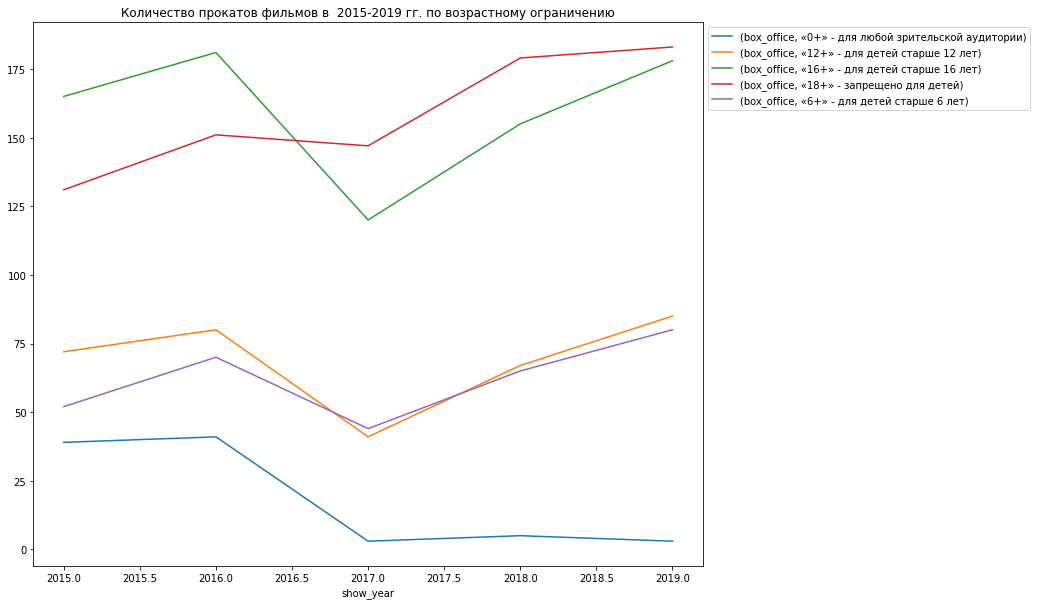

Количество прокатов фильмов в 2015-2019 гг. по возрастному ограничению:


show_year                             box_office  \
age_restriction           «0+» - для любой зрительской аудитории   
0                    2015                                     39   
1                    2016                                     41   
2                    2017                                      3   
3                    2018                                      5   
4                    2019                                      3   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
0                                            72   
1                                            80   
2                                            41   
3                                            67   
4                                            85   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
0                                           165                         131   
1                                           181                         151   
2                                           120                         147   
3                                           155                         179   
4                                           178                         183   

                                               
age_restriction «6+» - для детей старше 6 лет  
0                                          52  
1                                          70  
2                                          44  
3                                          65  
4                                          80

In [99]:
age_year_count = movies_merge.query('2015<=show_year<=2019').pivot_table(index='show_year',columns='age_restriction',values=['box_office'],aggfunc='count')
age_year_count.plot(kind="line",figsize=(12,10),title='Количество прокатов фильмов в  2015-2019 гг. по возрастному ограничению')
plt.legend(bbox_to_anchor=(1,1))
plt.show()
print(f'Количество прокатов фильмов в 2015-2019 гг. по возрастному ограничению:')
display(age_year_count.reset_index())

По графикам можно сделать вывод:<br><b>- Фильмы 0+:</b> Стабильно низкие сборы за данный период. Но есть интересный момент: резкое сокращение количества прокатов фильмов 0+ в 10 раз не привело к такому же резкому сокращению сборов от этих фильмов<br><b>- Фильмы 6+, 12+ и 18+:</b> Наблюдается рост кассовых сборов примерно с одной зависимостью. Такая же тенденция и по количеству прокатов. Т.е. можно предположить, что качество не меняется, сумма сборов определяется только количеством прокатов<br><b>- Фильмы 16+:</b> Самый интересный график. В 2017 году сумма сборов для этой категории фильмов была максимальной среди всех категорий и рекордной для самой себя, но при этом количество прокатов было так же рекордно низким. Можно предположить выход в этом году чего-то кассового (Если это только были "Звездные войны: Последние джедаи" ??)<br>

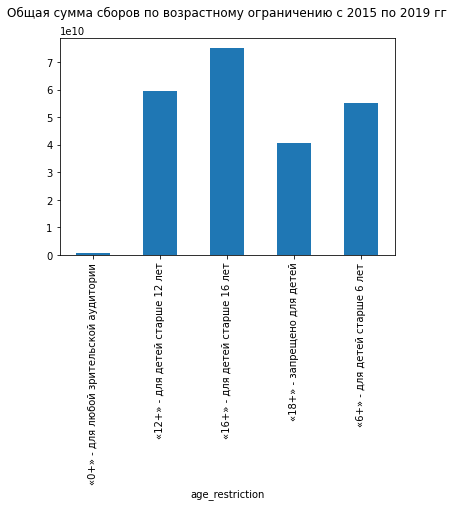

age_restriction
«0+» - для любой зрительской аудитории     91
«12+» - для детей старше 12 лет           345
«16+» - для детей старше 16 лет           799
«18+» - запрещено для детей               791
«6+» - для детей старше 6 лет             311
Name: box_office, dtype: int64

In [40]:
movies_merge.query('2015<=show_year<=2019').groupby(['age_restriction'])['box_office'].agg('sum').plot(kind='bar', title="Общая сумма сборов по возрастному ограничению с 2015 по 2019 гг\n")
plt.show()
movies_merge.query('2015<=show_year<=2019').groupby(['age_restriction'])['box_office'].agg('count')

Больше всего кассовых сборов за 2015-2019 года принесли фильмы 16+. Это можно довольно просто объяснить тем, что именно фильмов 16+ было выпущено в прокат больше всего и часто они интересны и зрителям 18+. Плюс 2017 год, рекордный по суммам сборов этой категории фильмов, как  мы выяснили шагом раньше.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [41]:
gos_budget = movies_merge.query('budget > 0') # отберем все фильмы с гос.поддержкой в отдельный ДФ

In [42]:
pd.options.mode.chained_assignment = None
gos_budget['payback'] = (gos_budget['box_office']/gos_budget['budget'])*100 # процент окупаемости картины

In [43]:
print(f'Средний и медианный процент окупаемости фильмов с гос.поддержкой:\n \
    Средний:{gos_budget["payback"].mean():.2f}\n \
    Медианный:{gos_budget["payback"].median():.2f} ')

Средний и медианный процент окупаемости фильмов с гос.поддержкой:
     Средний:76.33
     Медианный:14.87 


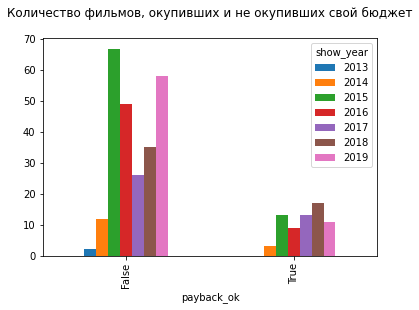

show_year,2013,2014,2015,2016,2017,2018,2019
payback_ok,,,,,,,
False,2.0,12.0,67.0,49.0,26.0,35.0,58.0
True,NaN,3.0,13.0,9.0,13.0,17.0,11.0


In [44]:
gos_budget['payback_ok'] = gos_budget['payback'].apply(lambda x: True if x>=100 else False)
gos_budget.pivot_table(index='payback_ok',columns='show_year',values='type',aggfunc='count').plot(kind='bar',\
                       title='Количество фильмов, окупивших и не окупивших свой бюджет\n')
plt.show()
gos_budget.pivot_table(index='payback_ok',columns='show_year',values='type',aggfunc='count')

Грустно, но фильмы, снятые с гос.поддержкой редко когда окупают потраченный бюджет. И с течением времени картина не меняется

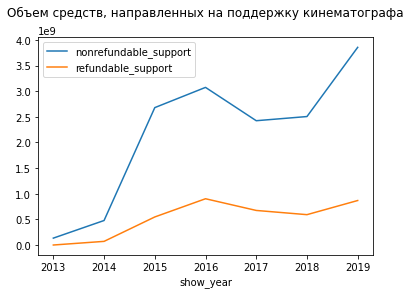

In [45]:
gos_budget.pivot_table(index='show_year',values=['nonrefundable_support','refundable_support'],\
                       aggfunc='sum').plot(kind='line', \
                       title='Объем средств, направленных на поддержку кинематографа\n')
plt.show()

С каждым годом объем средств, как возвратных, так и невозвратных, направленных на поддержку отечественного кинематографа, растет. Это не может не радовать

In [46]:
print('Количество прокатов фильмов с гос.поддержкой по возрастным категориям')
total_films_age = gos_budget.groupby('age_restriction')['title'].agg('count')
display(total_films_age)

print('Количество прокатов фильмов с гос.поддержкой по возрастным категориям, окупившим бюджет')
total_film_age_budget_ok = gos_budget[gos_budget['payback_ok']].groupby('age_restriction')['payback_ok'].agg('sum')
display(total_film_age_budget_ok)

display(total_film_age_budget_ok/total_films_age)

Количество прокатов фильмов с гос.поддержкой по возрастным категориям


age_restriction
«0+» - для любой зрительской аудитории      8
«12+» - для детей старше 12 лет           103
«16+» - для детей старше 16 лет           118
«18+» - запрещено для детей                27
«6+» - для детей старше 6 лет              59
Name: title, dtype: int64

Количество прокатов фильмов с гос.поддержкой по возрастным категориям, окупившим бюджет


age_restriction
«0+» - для любой зрительской аудитории     1
«12+» - для детей старше 12 лет           27
«16+» - для детей старше 16 лет           19
«18+» - запрещено для детей                2
«6+» - для детей старше 6 лет             17
Name: payback_ok, dtype: int64

age_restriction
«0+» - для любой зрительской аудитории    0.125000
«12+» - для детей старше 12 лет           0.262136
«16+» - для детей старше 16 лет           0.161017
«18+» - запрещено для детей               0.074074
«6+» - для детей старше 6 лет             0.288136
dtype: float64

Из всех снятых и окупившихся фильмов, больше всех - это фильмы категории 6+, 12+ и 16+. Т.е. российский детский кинематограф достоен внимания в плане гос.поддержки.<br>Фильмы 18+ и 0+ окупаются редко.

In [125]:
display(gos_budget[~gos_budget['payback'].isna()].loc[:,['title','age_restriction','box_office','payback']].sort_values(by='payback').tail(10))
display(gos_budget[~gos_budget['payback'].isna()].loc[:,['title','age_restriction','box_office','payback']].sort_values(by='payback').head(10))

,title,age_restriction,box_office,payback
5504,Последний богатырь,«12+» - для детей старше 12 лет,1.655038e+09,469.544109
5652,Движение вверх,«6+» - для детей старше 6 лет,2.779686e+09,470.979824
6177,Непрощенный,«16+» - для детей старше 16 лет,3.932796e+08,476.720558
5640,Ёлки Новые,«6+» - для детей старше 6 лет,8.554511e+08,490.561775
2204,8 новых свиданий,«12+» - для детей старше 12 лет,3.933446e+08,508.185695
2700,Самый Лучший День,«16+» - для детей старше 16 лет,6.830291e+08,522.915735
3228,"Гуляй, Вася !",«16+» - для детей старше 16 лет,2.590991e+08,664.356610
5748,Я худею,«16+» - для детей старше 16 лет,6.334623e+08,722.725130
5707,Лёд,«12+» - для детей старше 12 лет,1.445732e+09,972.998377
7455,Холоп,«12+» - для детей старше 12 лет,3.073569e+09,1920.980432


,title,age_restriction,box_office,payback
3148,Я-Учитель,«12+» - для детей старше 12 лет,1550.0,0.001703
3503,День До,«18+» - запрещено для детей,9000.0,0.009909
2802,Битва с экстрасенсами,«12+» - для детей старше 12 лет,6000.0,0.010074
2526,Вдвоем на льдине.,«12+» - для детей старше 12 лет,4450.0,0.011728
3656,Простая история .,«16+» - для детей старше 16 лет,58720.0,0.032622
2149,РЕВЕРБЕРАЦИЯ,«18+» - запрещено для детей,19820.0,0.053035
1448,Бесславные придурки,«12+» - для детей старше 12 лет,28140.0,0.075762
2947,ВСЯ НАША НАДЕЖДА...,«12+» - для детей старше 12 лет,35897.0,0.077699
2981,Сдается дом со всеми неудобствами,«12+» - для детей старше 12 лет,55800.0,0.080370
3146,Память осени,«16+» - для детей старше 16 лет,58500.0,0.083571


In [47]:
gos_budget

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_year,main_director,main_genre,percent_of_support,payback,payback_ok
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,33.370314,0.460074,False
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,0.0,Не указано,2.814000e+04,2014,А.Якимчук,Не указано,70.000000,0.075762,False
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,61.269064,11.337709,False
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.009473,0.137816,False
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,62.476381,0.580031,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,...,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,51.020408,73.235019,False
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,...,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,52.631579,263.720650,True
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,...,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,52.966102,NaN,False
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,64.999783,NaN,False


Количество фильмов с гос.поддержкой с округленым рейтингом:


,Количество,Окупилось
ratings_round,,
0.0,15,1
1.0,1,0
2.0,1,0
3.0,10,1
4.0,15,2
5.0,54,15
6.0,116,20
7.0,77,19
8.0,24,8


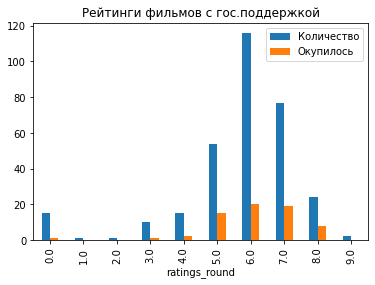

In [48]:
gos_budget['ratings_round'] = gos_budget['ratings'].round() # округляем рейтинг для укрупнения

print('Количество фильмов с гос.поддержкой с округленым рейтингом:')
rating_ok = (
    gos_budget
    .groupby('ratings_round')['payback_ok']
    .agg(['count','sum'])
    .rename(columns={'count':'Количество','sum':'Окупилось'})
)
display(rating_ok)
rating_ok.plot(kind='bar',title='Рейтинги фильмов с гос.поддержкой')
plt.show()

In [49]:
gos_budget.query('ratings_round == 9')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,show_year,main_director,main_genre,percent_of_support,payback,payback_ok,ratings_round
2145,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,...,9.4,"фантастика,боевик,комедия",334750.0,2015,Ю.Кара,фантастика,25.00000,0.836875,False,9.0
3138,Я умею вязать,111019615,2015-11-27 12:00:00+00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.0,...,9.0,драма,801370.0,2015,Н.Степанова при участии С.Иванова,драма,32.49792,5.541034,False,9.0


Как видно, окупаются фильмы со средним рейтингом 5-8 баллов на Кинопоиске. Т.е. оценки зрителей отражают качество картины и дают возможность предположить окупится фильм или нет.<br>А что с картинами с рейтингом в 9 баллов - это строки, к которых рейтинг был указан в процентах и переведен в единицы искусственно. Т.е. в данном анализе на них можно не обращать внимания и уточнить у заказчика, что означают проценты в графе рейтинга.

### Шаг 5. Напишите общий вывод

В ходе исследования рынка российского кинопроката я проделал следующие шаги. <br><ul>
<li>1. Обработал входные данные. Пропущенные значения, которые невозможно было восстановить, но они не влияли на дальнейший анализ, заменил на "Не указано" (Режиссер, Продюсер, Страна производства). Те же пропущенные данные, от которых зависил дальнейший анализ, как budget пришлось удалить полностью. Есть вопросы по исходным данным, которые нужно уточнить у заказчика: как интерпретировать рейтинг, указанный в процентах? В рамках обработки были исправлены неявные дубликаты данных, вызванные скорее всего ручным вводом без проверки системой.Добавлены новые столбцы для удобства дальнейшего анализа.</li><br>
<li>2. Провел анализ и посчитал, сколько фильмов выходило в прокат каждый год. Выяснил, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировал, изменение этой доля менялась по годам.</li><br>
<li>3. Выяснил изменение динамики проката по годам, указанным в исходных данных.</li><br>
<li>4. Посчитал среднюю и медианную сумму сборов для каждого года.</li><br>
<li>5. Выяснил влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год.</li><br>
<li>6. Провел исследование фильмов, получивших гос.поддержку.</li><br></ul>

<b>Addon</b><br>В результате проведенного исследования было выяснено, что самымы окупаемыми в российском кинопрокате являются фильмы с возрастной категорией 16+, даже в самый неудачный для всего кинематографа 2017ый год, этот сегмент картин показал рекордные сборы.<br>
Что касается российского киноматографа, то самы окупаемые - это так же фильмы для детей и подростков, возратные категории 6+, 12+ и 16+. Именно они в большинстве случаев окупают бюджет и в том числе средства гос. поддержки. Но стоит отметить, то процент окупаемых фильмов остается очень низким.<br>
Примеры самых кассовых российских картин: Холоп, Лед, Я худею - фильмы которые в несколько сот раз окупили бюджет.<br>
Примеры самых провальных российских картин: Я-Учитель, День До, Битва с экстрасенсами - фильмы которые окупили меньше 10% вложеных средств<br>
Следует провести анализ жанров, актеров, режиссеров фильмов-ледеров и фильмов-аутсайдеров, чтобы взять лучше и избавиться от худшего. Возможно, что это поможет улучшить имидж отечественного кино и вывести эту отрасль из категории убыточных.